#Laboratory work 2. Variant 3. Geometrical Transformations, Convolution, and Maxpooling

Objective: the purpose of this laboratory work is to study basic geometric transformations and
core CNN operations.

In [ ]:
#imports, mounting google drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
True
/content/drive/MyDrive/CV-Spring-2026/lab2/images/baboon.png


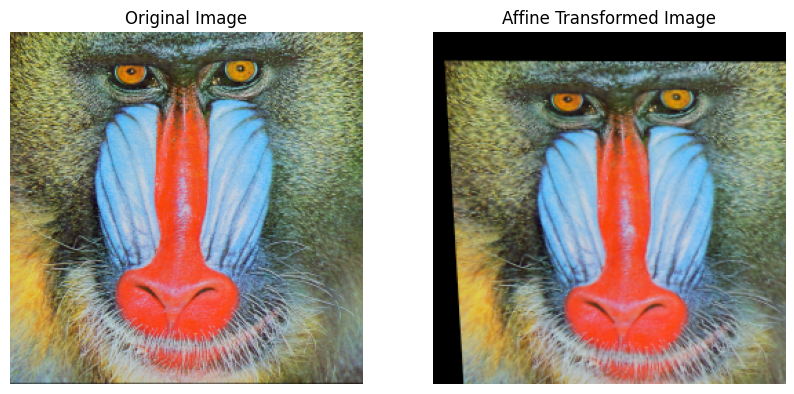

In [ ]:
#Task1. Geometrical transformations affine

#mounting image
drive.mount('/content/drive')
image_path = '/content/drive/MyDrive/CV-Spring-2026/lab2/images/baboon.png'
import os

print(os.path.exists(image_path))
print(image_path)

# loading and resizing the image
img = cv2.imread(image_path)
img = cv2.resize(img, (256, 256)) #reading image in BRG, making it 256x256. We do it so it will be consistent

# source and destination points
src_pts = np.array([[30, 30], [200, 40], [40, 210]], dtype=np.float32) #3 source points
dst_pts = np.array([[40, 50], [210, 60], [60, 220]], dtype=np.float32) #3 destination points, where points should be. These point pairs are determining affine transformation

# geting the affine matrix
M = cv2.getAffineTransform(src_pts, dst_pts) #affine transformation matrix is computed, here we are getting 2x3 matrix

# applying affine transformation
affine_img = cv2.warpAffine(img, M, (256, 256)) #here for every output pixel opencv is computing from where it came in original. This is inverse mapping

# displaying side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Affine Transformed Image')
plt.imshow(cv2.cvtColor(affine_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Inverse mapping is a method of applying geometric transformations where each pixel in the output image is mapped back to a corresponding position in the input image, rather than pushing pixels forward from the input.

Affine Matrix M:
 [[9.96721311e-01 5.57377049e-02 8.42622951e+00]
 [3.27868852e-03 9.44262295e-01 2.15737705e+01]]

Original Points:
[30. 30.]
[128. 128.]
[220. 180.]
Transformed Points:
[40. 50.]
[143.14098 142.85901]
[237.7377 192.2623]


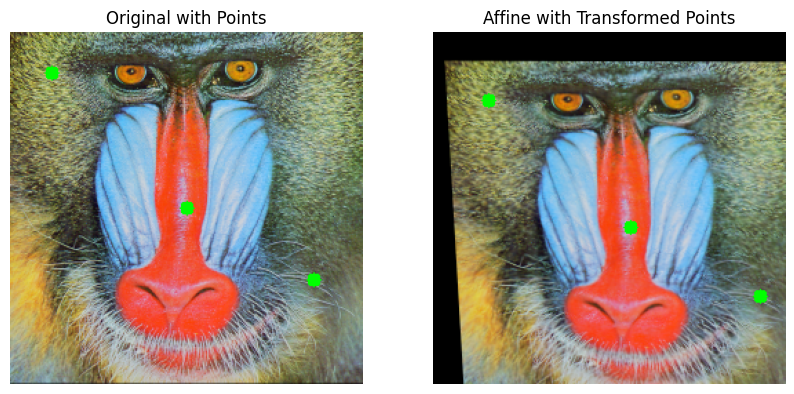

In [ ]:
#Task 2. Affine matrix printing and point verification

# print the affine matrix
print('Affine Matrix M:\n', M)

# points to transform
points = np.array([[[30, 30]], [[128, 128]], [[220, 180]]], dtype=np.float32) #one point is used in task 1, one point is central point, one is near border

# transform points
transformed_points = cv2.transform(points, M) #matrix multiplication, selected points are now being transformed
print('\nOriginal Points:')
for pt in points:
    print(pt[0])
print('Transformed Points:')
for pt in transformed_points:
    print(pt[0])

# draw points on original image
img_with_points = img.copy()
for pt in points:
    cv2.circle(img_with_points, (int(pt[0][0]), int(pt[0][1])), 5, (0, 255, 0), -1) #green circles mark original point location, radius is 5 pixels. Here  we just draw original points on the input image for visuals

# draw transformed points on affine image
affine_with_points = affine_img.copy()
for pt in transformed_points:
    cv2.circle(affine_with_points, (int(pt[0][0]), int(pt[0][1])), 5, (0, 255, 0), -1) #draw transformed points

# display with points
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original with Points')
plt.imshow(cv2.cvtColor(img_with_points, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Affine with Transformed Points')
plt.imshow(cv2.cvtColor(affine_with_points, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

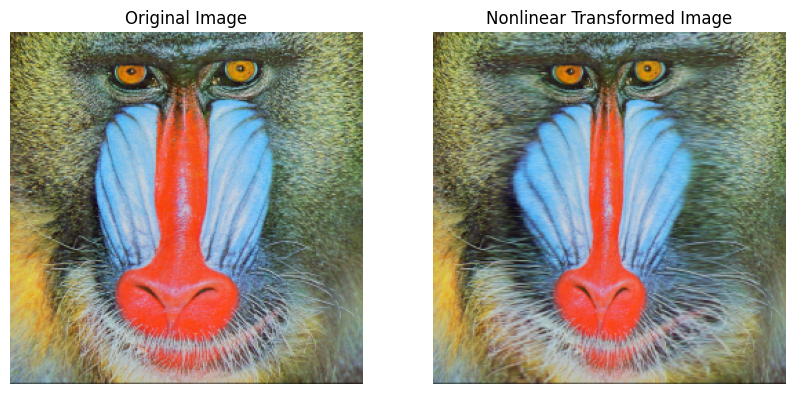

In [ ]:
#Task 3. Nonlinear geometric transformation using remap

# creating map_x and map_y
map_y, map_x = np.mgrid[0:256, 0:256] #creates a coordinate grid, now each pixel has a source
map_x = map_x.astype(np.float32)
map_y = map_y.astype(np.float32)

# sinusoidal horizontal shift: amplitude A=12, frequency f=2 across width=256
A = 12
f = 2
width = 256
map_x += A * np.sin(2 * np.pi * f * map_x / width)  # pixels are shifted only horizontally, shift follows sine wave, we did full 2 waves, and max displacement is +- 12 pixels

# apply remap
nonlinear_img = cv2.remap(
    img,
    map_x,
    map_y,
    cv2.INTER_LINEAR, #border reflect is reflecting the image at the boundary, avoids black and empty regions when map_x is negative. Kind of mirror-like effect
    borderMode=cv2.BORDER_REFLECT) #for each x', y' opencv looks maps, samples the input image at that location, uses linear interpolation, if coordinates go outside the image it reflects them

# Display side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Nonlinear Transformed Image')
plt.imshow(cv2.cvtColor(nonlinear_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Interpolation is the process of estimating pixel values at fractional (non-integer) image coordinates by using neighboring pixel values.

In [ ]:
#Task 4. Pixel value check for nonlinear transform
# Pixel (x=70 column, y=160 row)
orig_rgb = img[160, 70]
nonlin_rgb = nonlinear_img[160, 70]
print('Original RGB at (70, 160):', orig_rgb)
print('Nonlinear RGB at (70, 160):', nonlin_rgb) #extracted RGB values from exact same location, but pixel values are different. Interpolation computes a new pixel value

Original RGB at (70, 160): [69 71 44]
Nonlinear RGB at (70, 160): [73 70 49]


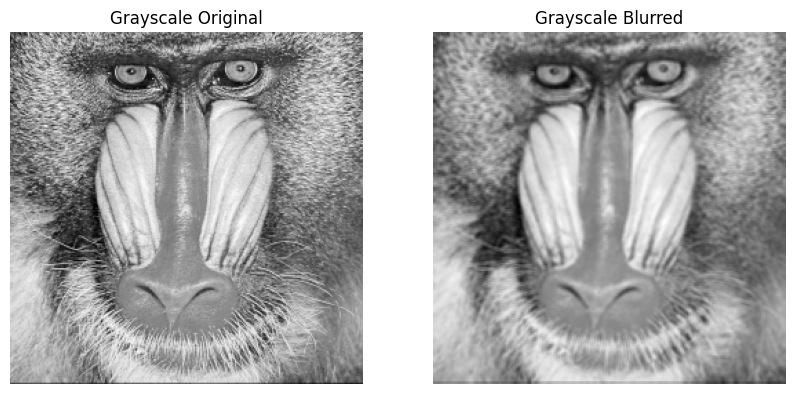

Original Grayscale Patch (90:95, 90:95):
 [[181 189 187 187 182]
 [183 188 187 188 182]
 [176 189 191 195 188]
 [180 181 188 196 190]
 [187 182 188 192 195]]
Blurred Grayscale Patch (90:95, 90:95):
 [[181 185 187 185 184]
 [181 185 189 187 186]
 [181 185 189 189 188]
 [182 185 189 191 190]
 [183 184 187 191 191]]


In [ ]:
#Task 5. Convolution with OpenCV blur

#Create a 3x3 averaging kernel, all values are equal and divided by 9 (so final sum is 1), it replaces each pixel with the average of its neighbors
kernel_blur = np.ones((3, 3), np.float32) / 9

#Apply convolution, -1 keeps the same image depth as in original, pic becomes smoother
blurred = cv2.filter2D(img, -1, kernel_blur)

# Convert to grayscale
gray_original = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

#display side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Grayscale Original')
plt.imshow(gray_original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Blurred')
plt.imshow(gray_blurred, cmap='gray')
plt.axis('off')
plt.show()

#printing 5x5 patch (rows 90-94, cols 90-94)
print('Original Grayscale Patch (90:95, 90:95):\n', gray_original[90:95, 90:95])
print('Blurred Grayscale Patch (90:95, 90:95):\n', gray_blurred[90:95, 90:95])

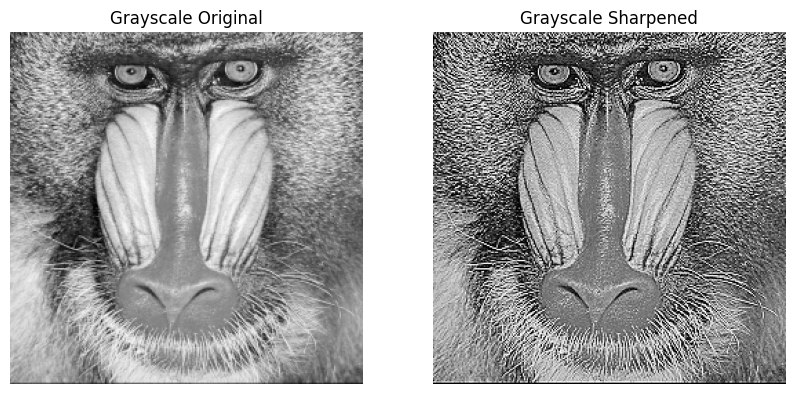

Sharpened Grayscale Patch (90:95, 90:95):
 [[179 200 186 193 178]
 [197 192 179 190 167]
 [151 209 198 211 187]
 [177 164 185 217 183]
 [206 176 190 191 212]]


In [ ]:
#Task 6. Convolution with OpenCV sharpening

# 3x3 sharpening kernel
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                           [0, -1, 0]], np.float32) #5 in center increases importance of current pixel, -1 substracts neighbor intensities. This enhances edges and makes details visible

#apply convolution
sharpened = cv2.filter2D(img, -1, kernel_sharpen)

#Convert sharpened image to grayscale
gray_sharpened = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)

#Display side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Grayscale Original')
plt.imshow(gray_original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Sharpened')
plt.imshow(gray_sharpened, cmap='gray')
plt.axis('off')
plt.show()

# Print 5x5 patch
print('Sharpened Grayscale Patch (90:95, 90:95):\n', gray_sharpened[90:95, 90:95])

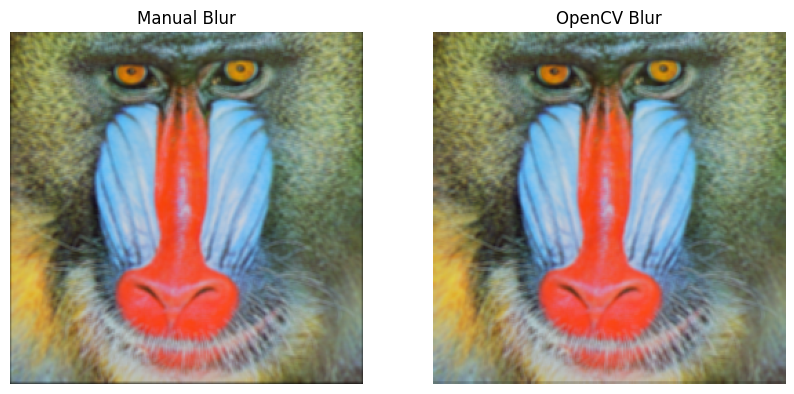

Manual Blur Grayscale Patch (90:95, 90:95):
 [[180 185 187 185 183]
 [180 185 188 187 185]
 [180 185 189 189 188]
 [181 185 189 191 190]
 [182 183 187 190 190]]
OpenCV Blur Grayscale Patch (90:95, 90:95):
 [[181 185 187 185 184]
 [181 185 189 187 186]
 [181 185 189 189 188]
 [182 185 189 191 190]
 [183 184 187 191 191]]


In [ ]:
#Task 7. Convolution from scratch NumPy

#Here I defined a manual 2d convolution function, we will try to blur without openCV
def manual_conv2d(image, kernel):

    h, w, c = image.shape #getting image dimesions

    kh, kw = kernel.shape #getting kernel sizes

    pad_h = kh // 2
    pad_w = kw // 2 #computing padding size so that output keeps same resolution which is 256x256

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant') #applying zero padding around the image borders

    output = np.zeros_like(image, dtype=np.float32)

    #slide the kernel over every pixel location
    for i in range(h):
        for j in range(w):
            for k in range(c):

                #multiplication between kernel and local region, then summing them to get output pixel
                output[i, j, k] = np.sum(padded[i:i+kh, j:j+kw, k] * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)  # Clip values to valid image range

# Apply manual convolution (using blur kernel as in task 5)
manual_blurred = manual_conv2d(img, kernel_blur)

# Display side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Manual Blur')
plt.imshow(cv2.cvtColor(manual_blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('OpenCV Blur')
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Grayscale for patches
gray_manual_blurred = cv2.cvtColor(manual_blurred, cv2.COLOR_BGR2GRAY)

# Print patches
print('Manual Blur Grayscale Patch (90:95, 90:95):\n', gray_manual_blurred[90:95, 90:95])
print('OpenCV Blur Grayscale Patch (90:95, 90:95):\n', gray_blurred[90:95, 90:95])

Input Shape: (256, 256)
Output Shape: (128, 128)
Input 4x4 Block (90:94, 90:94):
 [[181 185 187 185]
 [181 185 189 187]
 [181 185 189 189]
 [182 185 189 191]]
Output 2x2 Block (45:47, 45:47):
 [[185 189]
 [185 191]]


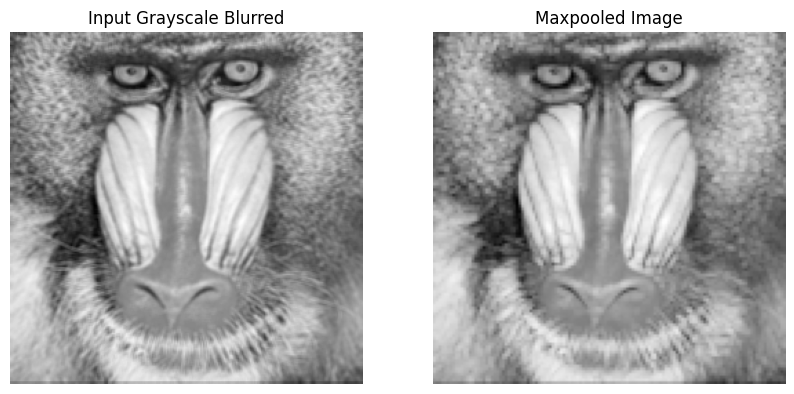

In [ ]:
#Task 8. Maxpooling NumPy

# manual maxpooling function
def manual_maxpool2d(image, pool_size=2, stride=2): #this reduces spatial resolution by selecting the maximum value from each non-overlapping 2x2 region

    h, w = image.shape #get input image dimesions

    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1 #compute output dimesions after pooling

    output = np.zeros((out_h, out_w), dtype=image.dtype) #output matrix

    #slide pooling window over the image
    for i in range(0, h - pool_size + 1, stride):
        for j in range(0, w - pool_size + 1, stride):

            #select 2x2 local region and take the maximum value inside that region
            output[i//stride, j//stride] = np.max(image[i:i+pool_size, j:j+pool_size])

    return output

# Apply maxpool on the blurred grayscale image
pooled = manual_maxpool2d(gray_blurred)

# Print shapes so we can see reduction. Size becomes 128 because window size is 2, stride is 2, so every step jumps 2 pixels and we reduce resolution by factor 2
print('Input Shape:', gray_blurred.shape)
print('Output Shape:', pooled.shape)

# Print blocks
print('Input 4x4 Block (90:94, 90:94):\n', gray_blurred[90:94, 90:94])
print('Output 2x2 Block (45:47, 45:47):\n', pooled[45:47, 45:47])

# Display side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Input Grayscale Blurred')
plt.imshow(gray_blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Maxpooled Image')
plt.imshow(pooled, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#Task 9. Manual calculation of convolution
# Input patch and kernel
patch = [[2, 1, 3],
         [0, 4, 2],
         [1, 2, 0]]

kernel = [[1, 1, 1],
          [1, 1, 1],
          [1, 1, 1]]

# Compute multiplications and sum
multiplications = []

total = 0

for i in range(3):
    for j in range(3):
        mult = patch[i][j] * kernel[i][j]
        multiplications.append(mult)
        total += mult

# Output
print("Multiplications:", multiplications)
print("Final sum:", total)

Multiplications: [2, 1, 3, 0, 4, 2, 1, 2, 0]
Final sum: 15


In [ ]:
#Task 10. Manual calculation of maxpooling

# Input matrix
matrix = [[3, 1, 4, 2], [0, 5, 2, 1], [6, 2, 1, 7], [4, 3, 0, 5]]

# Define the four 2x2 windows
windows = [
    [[matrix[0][0], matrix[0][1]],
     [matrix[1][0], matrix[1][1]]],  # Top-left

    [[matrix[0][2], matrix[0][3]],
     [matrix[1][2], matrix[1][3]]],  # Top-right

    [[matrix[2][0], matrix[2][1]],
     [matrix[3][0], matrix[3][1]]],  # Bottom-left

    [[matrix[2][2], matrix[2][3]],
     [matrix[3][2], matrix[3][3]]]   # Bottom-right
]

# Compute max for each window
maxes = [max(max(row) for row in window) for window in windows]

# Build output matrix
output = [[maxes[0], maxes[1]], [maxes[2], maxes[3]]]

# Output
print("Windows:")
for window in windows:
    print(window)
print("Chosen maximums:", maxes)
print("Final 2x2 output matrix:", output)

Windows:
[[3, 1], [0, 5]]
[[4, 2], [2, 1]]
[[6, 2], [4, 3]]
[[1, 7], [0, 5]]
Chosen maximums: [5, 4, 6, 7]
Final 2x2 output matrix: [[5, 4], [6, 7]]
